In [1]:
import pandas as pd
from pyxlsb import open_workbook as open_xlsb
import matplotlib.pyplot as plt

df = []

with open_xlsb('nyc_benchmarking_disclosure_data_reported_in_2017.xlsb') as wb:
    with wb.get_sheet(2) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

df = pd.DataFrame(df[1:], columns=df[0])

In [2]:
df.drop(df[(df['ENERGY STAR Score'] == 'Not Available')].index, inplace=True)
df['ENERGY STAR Score'] = df['ENERGY STAR Score'].astype(float)

In [3]:
df.loc[df['Primary Property Type - Self Selected'].str.contains('Other|Storage|Warehouse|Mixed Use Property|Museum|Manufacturing/Industrial Plant'), 'Primary Property Type - Self Selected'] = 'Other'

In [4]:
education = ['College/University', 'Library', 'K-12 School', 'Pre-school/Daycare', 'Adult Education', 'Laboratory']
healthcare = ['Hospital', 'Medical Office', 'Ambulatory Surgical Center', 'Residential Care Facility',
              'Outpatient Rehabilitation/Physical Therapy']
sport_arts = ['Movie Theater', 'Performing Arts', 'Worship Facility', 'Fitness Center/Health Club/Gym', 'Ice/Curling Rink']
retailing = ['Strip Mall', 'Retail Store', 'Enclosed Mall', 'Automobile Dealership', 'Supermarket/Grocery Store', 'Wholesale Club/Supercenter']
services_food = ['Hotel', 'Restaurant', 'Repair Services', 'Food Service', 'Parking', 'Mailing Center/Post Office']
banks_offices = ['Office', 'Bank Branch', 'Financial Office', ]
gov_infrstr = ['Multifamily Housing', 'Residence Hall/Dormitory', 'Social/Meeting Hall', 'Senior Care Community', 'Distribution Center',
               'Courthouse']

In [5]:
df.loc[df['Primary Property Type - Self Selected'].str.contains('|'.join(education)), 'Primary Property Type - Self Selected'] = 'Education'
df.loc[df['Primary Property Type - Self Selected'].str.contains('|'.join(healthcare)), 'Primary Property Type - Self Selected'] = 'Healthcare'
df.loc[df['Primary Property Type - Self Selected'].str.contains('|'.join(sport_arts)), 'Primary Property Type - Self Selected'] = 'Sports/Arts'
df.loc[df['Primary Property Type - Self Selected'].str.contains('|'.join(retailing)), 'Primary Property Type - Self Selected'] = 'Retailing'
df.loc[df['Primary Property Type - Self Selected'].str.contains('|'.join(banks_offices)), 'Primary Property Type - Self Selected'] = 'Banks/offices'
df.loc[df['Primary Property Type - Self Selected'].str.contains('|'.join(services_food)), 'Primary Property Type - Self Selected'] = 'Services/Food'
df.loc[df['Primary Property Type - Self Selected'].str.contains('|'.join(gov_infrstr)), 'Primary Property Type - Self Selected'] = 'Gov. infrastructure'

In [6]:
df1 = df[['Primary Property Type - Self Selected', 'ENERGY STAR Score']]

In [7]:
df1.groupby('Primary Property Type - Self Selected')['ENERGY STAR Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Primary Property Type - Self Selected,,,,,,,,
Banks/offices,1183.0,71.095520,24.115630,1.0,61.00,78.0,88.00,100.0
Education,95.0,56.652632,32.293128,1.0,29.50,59.0,83.50,100.0
Gov. infrastructure,7774.0,58.687420,30.228880,1.0,35.00,63.0,85.00,100.0
Healthcare,70.0,56.971429,33.912065,1.0,29.25,58.5,87.50,100.0
Other,210.0,60.766667,32.589778,1.0,34.25,67.5,89.00,100.0
Retailing,87.0,63.586207,28.026794,1.0,51.00,71.0,83.00,100.0
Services/Food,212.0,39.938679,27.135626,1.0,17.75,36.0,58.25,100.0
Sports/Arts,11.0,58.727273,36.788832,2.0,27.50,78.0,86.50,100.0


Primary Property Type - Self Selected
Banks/offices          AxesSubplot(0.125,0.125;0.775x0.755)
Education              AxesSubplot(0.125,0.125;0.775x0.755)
Gov. infrastructure    AxesSubplot(0.125,0.125;0.775x0.755)
Healthcare             AxesSubplot(0.125,0.125;0.775x0.755)
Other                  AxesSubplot(0.125,0.125;0.775x0.755)
Retailing              AxesSubplot(0.125,0.125;0.775x0.755)
Services/Food          AxesSubplot(0.125,0.125;0.775x0.755)
Sports/Arts            AxesSubplot(0.125,0.125;0.775x0.755)
Name: ENERGY STAR Score, dtype: object

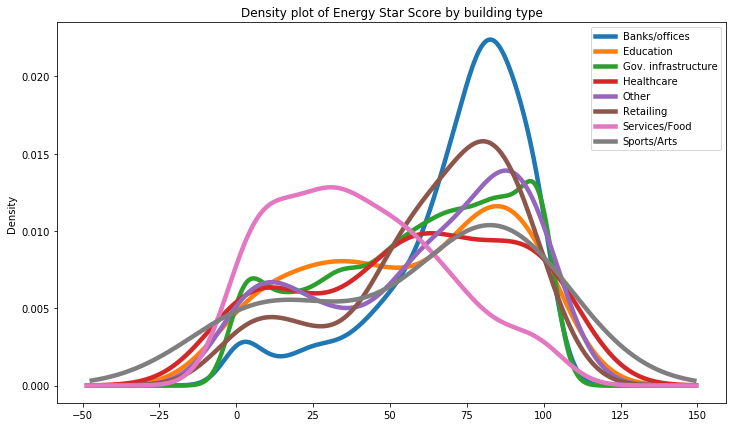

In [8]:
fig, ax = plt.subplots(figsize=(12,7))
df1.groupby('Primary Property Type - Self Selected')['ENERGY STAR Score'].plot(kind='density', legend=True, ax=ax, linewidth=4.5,
                                                                               title='Density plot of Energy Star Score by building type')